<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/dbscan/DBScan_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

class DBSCAN(object):

    def __init__(self,x,epsilon,minpts):
        # The number of input dataset
        self.n = len(x)
        # Euclidean distance
        p, q = np.meshgrid(np.arange(self.n), np.arange(self.n))
        self.dist = np.sqrt(np.sum(((x[p] - x[q])**2),2))
        # label as visited points and noise
        self.visited = np.full((self.n), False)
        self.noise = np.full((self.n),False)
        # DBSCAN Parameters
        self.epsilon = epsilon
        self.minpts = minpts
        # Cluseter
        self.idx = np.full((self.n),0)
        self.C = 0
        self.input = x

    def run(self):
        # Clustering
        for i in range(len(self.input)):
            if self.visited[i] == False:
                self.visited[i] = True
                self.neighbors = self.regionQuery(i)
                if len(self.neighbors) >= self.minpts:
                    self.C += 1
                    self.expandCluster(i)
                else : self.noise[i] = True
        return self.idx,self.noise

    def regionQuery(self, i):
        g = self.dist[i,:] < self.epsilon
        Neighbors = np.where(g)[0].tolist()
        return Neighbors

    def expandCluster(self, i):
        self.idx[i] = self.C
        k = 0

        while True:
            if len(self.neighbors) <= k:return
            j = self.neighbors[k]
            if self.visited[j] != True:
                self.visited[j] = True

                self.neighbors2 = self.regionQuery(j)
                v = [self.neighbors2[i] for i in np.where(self.idx[self.neighbors2]==0)[0]]

                if len(self.neighbors2) >=  self.minpts:
                    self.neighbors = self.neighbors+v

            if self.idx[j] == 0 : self.idx[j] = self.C
            k += 1

    def sort(self):

        cnum = np.max(self.idx)
        self.cluster = []
        self.noise = []
        for i in range(cnum):

            k = np.where(self.idx == (i+1))[0].tolist()
            self.cluster.append([self.input[k,:]])

        self.noise = self.input[np.where(self.idx == 0)[0].tolist(),:]
        return self.cluster, self.noise

    def plot(self):

        self.sort()
        fig,ax = plt.subplots()

        for idx,group in enumerate(self.cluster):

            ax.plot(group[0][:,0],
                    group[0][:,1],
                    marker='o',
                    linestyle='',
                    label='Cluster {}'.format(idx))

            if self.noise != None:
                ax.plot(self.noise[:,0],
                    self.noise[:,1],
                    marker='x',
                    linestyle='',
                    label='noise')

        ax.legend(fontsize=10, loc='upper left')
        plt.title('Scatter Plot of Clustering result', fontsize=15)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-1-cd35cc8b43f0>:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.noise != None:


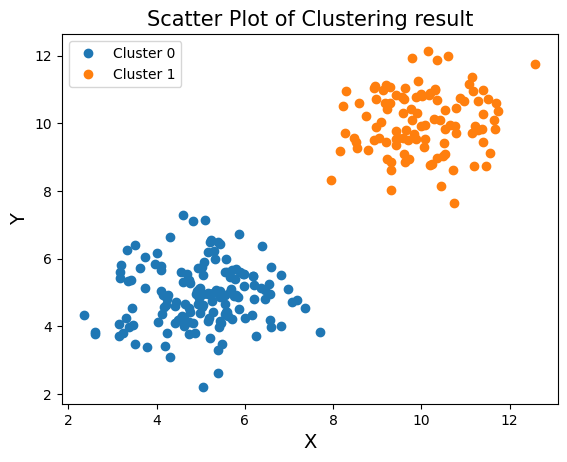

In [3]:
from scipy import io
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/My Drive/Machine Learning/DBScan/input.csv')
x = np.zeros([len(df), 2], float )
x[:, 0] = np.array(df['x1'], float)
x[:, 1] = np.array(df['x2'], float)
#%% Run DEMO
# INIT DBSCAN
dbscan = DBSCAN(x,1.5,4)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

<ipython-input-1-cd35cc8b43f0>:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.noise != None:


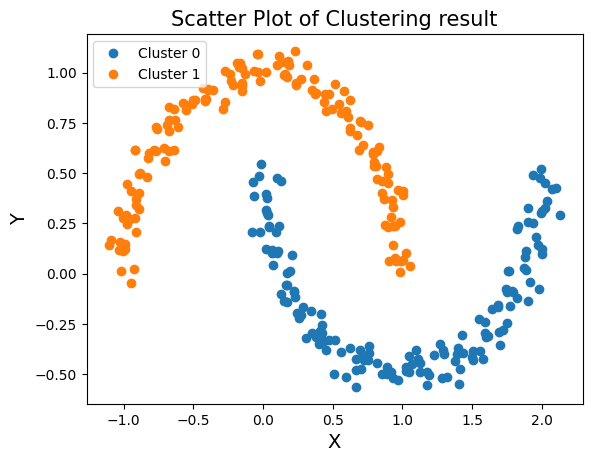

In [4]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# INIT DBSCAN
dbscan = DBSCAN(X, 0.3, 5)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

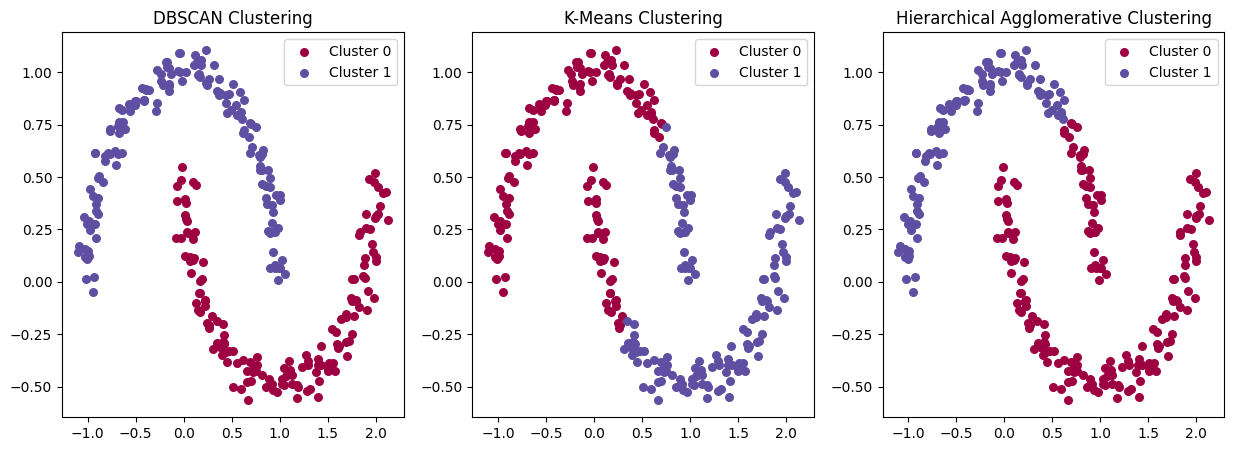

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons

# Generate synthetic data (you can replace this with your own data)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Hierarchical Agglomerative Clustering (HAC)
hac = AgglomerativeClustering(n_clusters=2)
hac_labels = hac.fit_predict(X)

# Plot the results for DBSCAN
plt.figure(figsize=(15, 5))

plt.subplot(131)
unique_labels_dbscan = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

for label, color in zip(unique_labels_dbscan, colors):
    if label == -1:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color='gray', s=10, label='Noise')
    else:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()

# Plot the results for K-Means
plt.subplot(132)
unique_labels_kmeans = np.unique(kmeans_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_kmeans)))

for label, color in zip(unique_labels_kmeans, colors):
    plt.scatter(X[kmeans_labels == label][:, 0], X[kmeans_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('K-Means Clustering')
plt.legend()

# Plot the results for HAC
plt.subplot(133)
unique_labels_hac = np.unique(hac_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_hac)))

for label, color in zip(unique_labels_hac, colors):
    plt.scatter(X[hac_labels == label][:, 0], X[hac_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('Hierarchical Agglomerative Clustering')
plt.legend()

plt.show()